<a href="https://colab.research.google.com/github/SarojaPandiyan/clustering/blob/main/K_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',True)

Mounted at /content/drive


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Clustering/data.csv')
numerical_data=data.iloc[:, 1:]
numerical_data=numerical_data.iloc[:,:2000]
numerical_data.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_1990,gene_1991,gene_1992,gene_1993,gene_1994,gene_1995,gene_1996,gene_1997,gene_1998,gene_1999
0,0.0,2.017209,3.265527,5.478487,10.431999,0,7.175175,0.591871,0.0,0.0,...,6.909077,8.455072,6.360101,0.0,8.118458,0.0,6.664156,6.520122,10.230549,0.591871
1,0.0,0.592732,1.588421,7.586157,9.623011,0,6.816049,0.000000,0.0,0.0,...,6.480349,8.852676,9.702685,0.0,8.335176,0.0,4.927347,5.339472,9.458925,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0,6.972130,0.452595,0.0,0.0,...,8.487068,9.261637,1.074163,0.0,7.378980,0.0,5.170201,5.199433,8.605079,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0,7.843375,0.434882,0.0,0.0,...,7.696974,8.714184,3.573556,0.0,7.955987,0.0,4.718575,5.776733,8.761727,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0,6.566967,0.360982,0.0,0.0,...,6.887586,9.110543,6.974942,0.0,7.784360,0.0,5.330185,4.283751,7.750137,0.889707


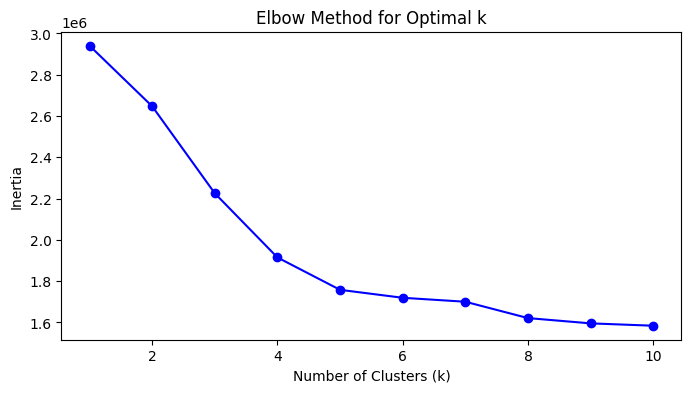

In [ ]:
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numerical_data)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmeans.fit_predict(numerical_data)

# Apply PCA for dimensionality reduction for visualization
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_data = pca.fit_transform(numerical_data)

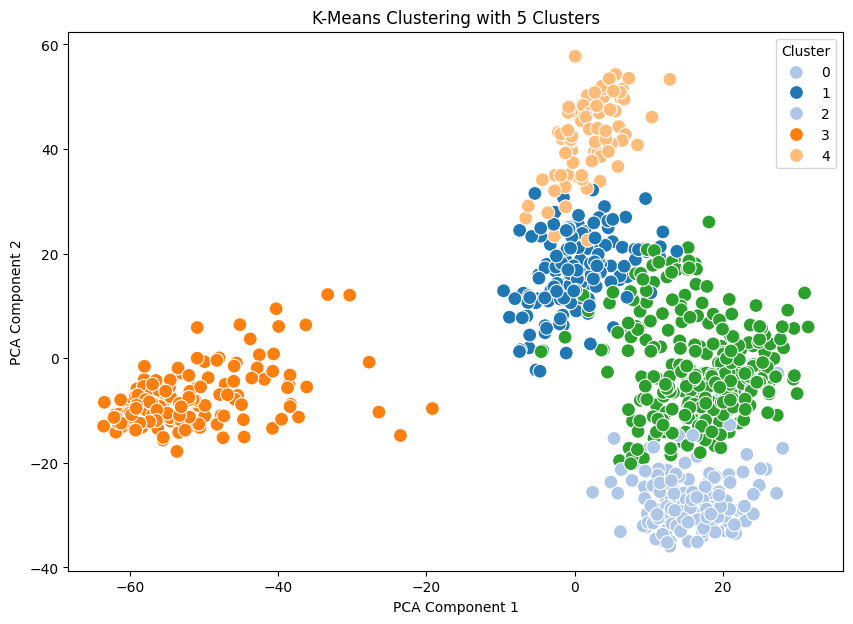

In [ ]:
# DataFrame with the principal components and cluster labels
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

# Plotting the clusters with PCA components
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=pca_df['PC1'],
    y=pca_df['PC2'],
    hue=pca_df['Cluster'],
    palette=sns.color_palette("tab20", n_colors=optimal_clusters),
    s=100
)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')

# Force legend to include all clusters
plt.legend(title='Cluster', labels=[str(i) for i in range(optimal_clusters)])
plt.show()